In [127]:
# Compare Trinomical Tree with Binomial Tree Benchmark with Black-Scholes 
# N = 20
import numpy as np
from scipy.stats import norm

# Black-Scholes Model 
def black_scholes_price(S, K, T, r, sigma, q=0.0, option_type='call'):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return price

# Binomial Tree
def binomial_tree_option(S, K, T, r, sigma, q=0.0, N=20, option_type='call', american=False):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp((r - q) * dt) - d) / (u - d)

    ST = np.array([S * (u ** j) * (d ** (N - j)) for j in range(N + 1)])
    values = np.maximum(ST - K, 0) if option_type == 'call' else np.maximum(K - ST, 0)

    for i in range(N - 1, -1, -1):
        values = np.exp(-r * dt) * (p * values[1:i+2] + (1 - p) * values[0:i+1])
        if american:
            ST = np.array([S * (u ** j) * (d ** (i - j)) for j in range(i + 1)])
            intrinsic = np.maximum(ST - K, 0) if option_type == 'call' else np.maximum(K - ST, 0)
            values = np.maximum(values, intrinsic)
    return values[0]

# Trinomial Tree 
def trinomial_tree_option(S, K, T, r, sigma, q=0.0, N=20, option_type='call', american=False):
    dt = T / N
    dx = sigma * np.sqrt(3 * dt)
    discount = np.exp(-r * dt)
    u = np.exp(dx)
    d = 1 / u

    nu = r - q - 0.5 * sigma ** 2
    pu = 1/6 + (nu * np.sqrt(dt / (12 * sigma ** 2)))
    pd = 1/6 - (nu * np.sqrt(dt / (12 * sigma ** 2)))
    pm = 1 - pu - pd

    nodes = {}
    for i in range(-N, N + 1):
        ST = S * (u ** i)
        nodes[i] = max(ST - K, 0) if option_type == 'call' else max(K - ST, 0)

    for step in range(N - 1, -1, -1):
        new_nodes = {}
        for i in range(-step, step + 1):
            value = discount * (
                pu * nodes.get(i + 1, 0) +
                pm * nodes.get(i, 0) +
                pd * nodes.get(i - 1, 0)
            )
            if american:
                S_now = S * (u ** i)
                intrinsic = max(S_now - K, 0) if option_type == 'call' else max(K - S_now, 0)
                value = max(value, intrinsic)
            new_nodes[i] = value
        nodes = new_nodes
    return nodes[0]

if __name__ == "__main__":
    S = 100
    K = 100
    T = 1
    r = 0.05
    sigma = 0.3
    N = 20  

    dividend_cases = [0.0, 0.02]
    dividend_labels = ['No Dividend', 'With Dividend']
    option_styles = ['European', 'American']
    option_types = ['call', 'put']

    print(f"\nResults for N = {N}")

    for q, div_label in zip(dividend_cases, dividend_labels):
        print(f"\nWhen {div_label}:")

        for style in option_styles:
            is_american = (style == 'American')
            print(f"\n-- {style} Options --")

            for opt_type in option_types:
                print(f"\n{opt_type.capitalize()} Option:")

                if style == 'European':
                    bs_price = black_scholes_price(S, K, T, r, sigma, q, option_type=opt_type)
                    print(f"Black-Scholes: {bs_price:.4f}")

                btree = binomial_tree_option(S, K, T, r, sigma, q=q, N=N, option_type=opt_type, american=is_american)
                print(f"Binomial Tree: {btree:.4f}")

                ttree = trinomial_tree_option(S, K, T, r, sigma, q=q, N=N, option_type=opt_type, american=is_american)
                print(f"Trinomial Tree: {ttree:.4f}")



Results for N = 20

When No Dividend:

-- European Options --

Call Option:
Black-Scholes: 14.2313
Binomial Tree: 14.0849
Trinomial Tree: 14.0870

Put Option:
Black-Scholes: 9.3542
Binomial Tree: 9.2079
Trinomial Tree: 9.2100

-- American Options --

Call Option:
Binomial Tree: 14.0849
Trinomial Tree: 14.0870

Put Option:
Binomial Tree: 9.7980
Trinomial Tree: 9.7246

When With Dividend:

-- European Options --

Call Option:
Black-Scholes: 13.0203
Binomial Tree: 12.8766
Trinomial Tree: 12.8752

Put Option:
Black-Scholes: 10.1234
Binomial Tree: 9.9797
Trinomial Tree: 9.9788

-- American Options --

Call Option:
Binomial Tree: 12.8766
Trinomial Tree: 12.8753

Put Option:
Binomial Tree: 10.3872
Trinomial Tree: 10.3321


In [128]:
# Compare Trinomical Tree with Binomial Tree Benchmark with Black-Scholes 
# N = 200
import numpy as np
from scipy.stats import norm

# Black-Scholes model 
def black_scholes_price(S, K, T, r, sigma, q=0.0, option_type='call'):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return price

# Binomial Tree model
def binomial_tree_option(S, K, T, r, sigma, q=0.0, N=20, option_type='call', american=False):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp((r - q) * dt) - d) / (u - d)
    
    # Stock prices at maturity
    ST = np.array([S * (u ** j) * (d ** (N - j)) for j in range(N + 1)])
    if option_type == 'call':
        values = np.maximum(ST - K, 0)
    else:
        values = np.maximum(K - ST, 0)
    
    # Backward induction
    for i in range(N - 1, -1, -1):
        values = np.exp(-r * dt) * (p * values[1:i+2] + (1 - p) * values[0:i+1])
        if american:
            ST = np.array([S * (u ** j) * (d ** (i - j)) for j in range(i + 1)])
            intrinsic = np.maximum(ST - K, 0) if option_type == 'call' else np.maximum(K - ST, 0)
            values = np.maximum(values, intrinsic)
    return values[0]

# Trinomial Tree model
def trinomial_tree_option(S, K, T, r, sigma, q=0.0, N=20, option_type='call', american=False):
    dt = T / N
    dx = sigma * np.sqrt(3 * dt)
    discount = np.exp(-r * dt)

    u = np.exp(dx)
    d = 1 / u
    m = 1.0  # middle

    # Probabilities
    nu = r - q - 0.5 * sigma ** 2
    pu = 1/6 + (nu * np.sqrt(dt / (12 * sigma ** 2)))
    pd = 1/6 - (nu * np.sqrt(dt / (12 * sigma ** 2)))
    pm = 1 - pu - pd

    # Initialize asset prices and option values at maturity
    nodes = {}
    for i in range(-N, N + 1):
        ST = S * (u ** i)
        if option_type == 'call':
            nodes[i] = max(ST - K, 0)
        else:
            nodes[i] = max(K - ST, 0)

    # Backward induction
    for step in range(N - 1, -1, -1):
        new_nodes = {}
        for i in range(-step, step + 1):
            value = discount * (
                pu * nodes.get(i + 1, 0) +
                pm * nodes.get(i, 0) +
                pd * nodes.get(i - 1, 0)
            )

            if american:
                S_now = S * (u ** i)
                intrinsic = max(S_now - K, 0) if option_type == 'call' else max(K - S_now, 0)
                value = max(value, intrinsic)

            new_nodes[i] = value
        nodes = new_nodes

    return nodes[0]


if __name__ == "__main__":
    
    N = 200  
    
    S = 100     # Spot price
    K = 100     # Strike price
    T = 1       # Time to maturity (1 year)
    r = 0.05    # Risk-free interest rate
    sigma = 0.3 # Volatility

    dividend_cases = [0.0, 0.02]  # No dividend, 2% dividend
    dividend_labels = ['No Dividend', 'With Dividend']
    option_styles = ['European', 'American']
    option_types = ['call', 'put']
    print(f"\nResults for N = {N}")

    for q, div_label in zip(dividend_cases, dividend_labels):
        print(f"\nWhen {div_label}:")

        for style in option_styles:
            is_american = (style == 'American')
            print(f"\n-- {style} Options --")

            for opt_type in option_types:
                print(f"\n{opt_type.capitalize()} Option:")

                if style == 'European':
                    
                    bs_price = black_scholes_price(S, K, T, r, sigma, q, option_type=opt_type)
                    print(f"Black-Scholes: {bs_price:.4f}")

                btree = binomial_tree_option(S, K, T, r, sigma, q=q, N=N, option_type=opt_type, american=is_american)
                print(f"Binomial Tree: {btree:.4f}")

                ttree = trinomial_tree_option(S, K, T, r, sigma, q=q, N=N, option_type=opt_type, american=is_american)
                print(f"Trinomial Tree: {ttree:.4f}")



Results for N = 200

When No Dividend:

-- European Options --

Call Option:
Black-Scholes: 14.2313
Binomial Tree: 14.2165
Trinomial Tree: 14.2170

Put Option:
Black-Scholes: 9.3542
Binomial Tree: 9.3395
Trinomial Tree: 9.3399

-- American Options --

Call Option:
Binomial Tree: 14.2165
Trinomial Tree: 14.2170

Put Option:
Binomial Tree: 9.8632
Trinomial Tree: 9.8564

When With Dividend:

-- European Options --

Call Option:
Black-Scholes: 13.0203
Binomial Tree: 13.0058
Trinomial Tree: 13.0059

Put Option:
Black-Scholes: 10.1234
Binomial Tree: 10.1089
Trinomial Tree: 10.1091

-- American Options --

Call Option:
Binomial Tree: 13.0059
Trinomial Tree: 13.0060

Put Option:
Binomial Tree: 10.4630
Trinomial Tree: 10.4575


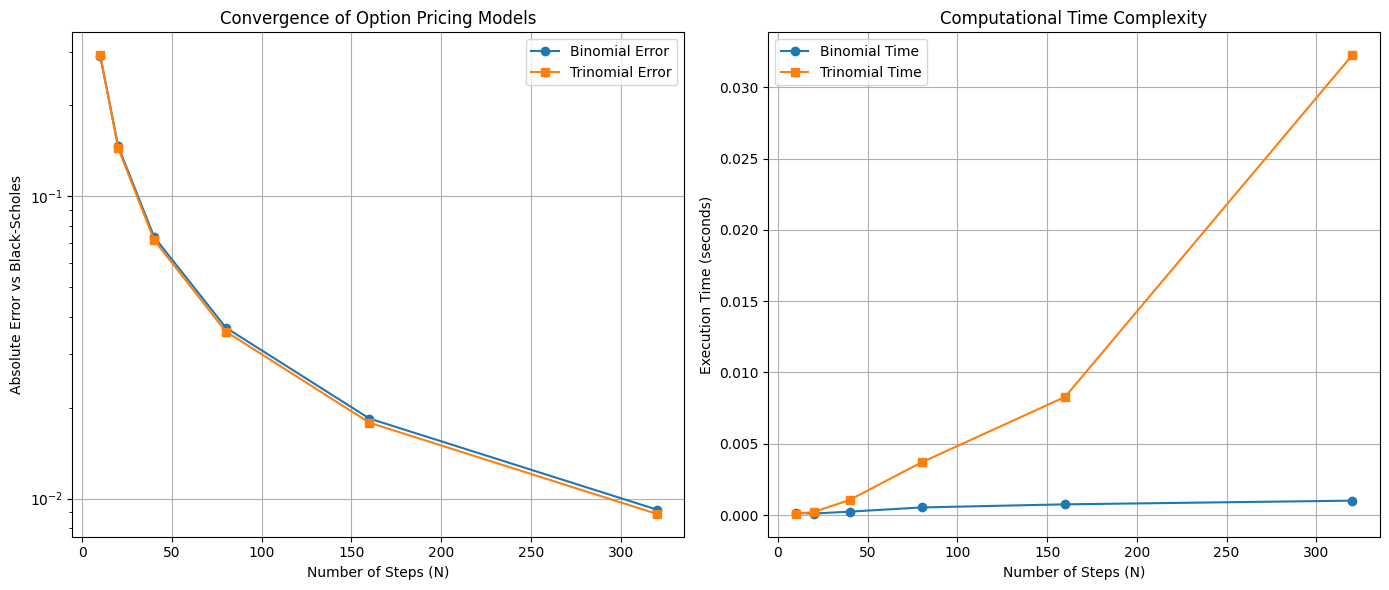

In [130]:
# convergence and computational complexity analysis
import time
import matplotlib.pyplot as plt
import numpy as np

option_type = 'call'
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.3
q = 0.0

# Black-Scholes (European reference value)
bs_price = black_scholes_price(S, K, T, r, sigma, q, option_type=option_type)

N_list = [10, 20, 40, 80, 160, 320]
binomial_errors = []
trinomial_errors = []
binomial_times = []
trinomial_times = []

for N in N_list:
    # Binomial
    start = time.perf_counter()
    b_price = binomial_tree_option(S, K, T, r, sigma, q, N, option_type, american=False)
    end = time.perf_counter()
    binomial_errors.append(abs(b_price - bs_price))
    binomial_times.append(end - start)

    # Trinomial
    start = time.perf_counter()
    t_price = trinomial_tree_option(S, K, T, r, sigma, q, N, option_type, american=False)
    end = time.perf_counter()
    trinomial_errors.append(abs(t_price - bs_price))
    trinomial_times.append(end - start)

# Plot convergence
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(N_list, binomial_errors, marker='o', label='Binomial Error')
ax1.plot(N_list, trinomial_errors, marker='s', label='Trinomial Error')
ax1.set_xlabel("Number of Steps (N)")
ax1.set_ylabel("Absolute Error vs Black-Scholes")
ax1.set_title("Convergence of Option Pricing Models")
ax1.set_yscale("log")
ax1.legend()
ax1.grid(True)

# Plot computational complexity
ax2.plot(N_list, binomial_times, marker='o', label='Binomial Time')
ax2.plot(N_list, trinomial_times, marker='s', label='Trinomial Time')
ax2.set_xlabel("Number of Steps (N)")
ax2.set_ylabel("Execution Time (seconds)")
ax2.set_title("Computational Time Complexity")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()  